In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
files = [
    "aalborg.csv",
    "aarhus2.csv",
    "hadsten.csv",
    "hobro.csv",
    "viborg.csv"
]

data = pd.read_csv("randers.csv")
data["location"] = "randers.csv"

for file in files:
    d = pd.read_csv(file)
    d["location"] = file
    data = pd.concat([data, d])

In [3]:
data

,pv_estimate,period_end,period,location
0,3.269,2023-05-03T12:00:00Z,PT30M,randers.csv
1,3.342,2023-05-03T11:30:00Z,PT30M,randers.csv
2,3.323,2023-05-03T11:00:00Z,PT30M,randers.csv
3,3.257,2023-05-03T10:30:00Z,PT30M,randers.csv
4,3.140,2023-05-03T10:00:00Z,PT30M,randers.csv
...,...,...,...,...
332,2.140,2023-04-26T14:00:00Z,PT30M,viborg.csv
333,2.296,2023-04-26T13:30:00Z,PT30M,viborg.csv
334,1.685,2023-04-26T13:00:00Z,PT30M,viborg.csv
335,1.523,2023-04-26T12:30:00Z,PT30M,viborg.csv


In [4]:
1011 / 48

21.0625

<Axes: >

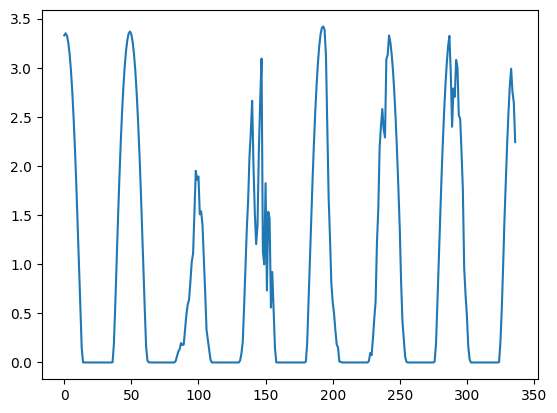

In [5]:
data[(data["location"] == "aalborg.csv")]["pv_estimate"].plot()

In [3]:
from tensorflow import keras
import numpy  as np

In [4]:
def normalize_time_series(time_series):
    min_val = np.min(time_series)
    max_val = np.max(time_series)
    normalized_time_series = (time_series - min_val) / (max_val - min_val)
    return normalized_time_series, min_val, max_val

def denormalize_time_series(normalized_time_series, min_val, max_val):
    time_series = normalized_time_series * (max_val - min_val) + min_val
    return time_series

In [9]:
aalborg = data[(data["location"] == "aalborg.csv")]["pv_estimate"]

In [5]:
splitlen = 48 * 2
toBePredicted = 48

#normAal, min, max = normalize_time_series(aalborg)

data["pv_estimate"], min , max = normalize_time_series(data["pv_estimate"])

split_set = []
"""
for i in range(normAal.shape[0]):
    temp = normAal[i:i+splitlen]
    if len(temp) < splitlen: break
    split_set.append(temp)
"""
for loc in data.location.unique():
    locSet = data[(data["location"] == loc)]["pv_estimate"]
    for i in range(locSet.shape[0]):
        temp = locSet[i:i+splitlen]
        if len(temp) < splitlen: break
        split_set.append(temp)
    

In [13]:
split_set = np.array(split_set)
split_set

array([[0.97339181, 0.97982456, 0.97280702, ..., 0.1871345 , 0.24093567,
        0.2997076 ],
       [0.97982456, 0.97280702, 0.95204678, ..., 0.24093567, 0.2997076 ,
        0.3245614 ],
       [0.97280702, 0.95204678, 0.91754386, ..., 0.2997076 , 0.3245614 ,
        0.44883041],
       ...,
       [0.66988304, 0.90263158, 0.91520468, ..., 0.82309942, 0.87426901,
        0.80497076],
       [0.90263158, 0.91520468, 0.97339181, ..., 0.87426901, 0.80497076,
        0.77251462],
       [0.91520468, 0.97339181, 0.95263158, ..., 0.80497076, 0.77251462,
        0.65584795]])

In [15]:
split_set.shape

(242, 96)

In [16]:
x_train = split_set[:,:splitlen -toBePredicted]
y_train = split_set[:, splitlen - toBePredicted:]
print(y_train.shape,x_train.shape)
print(x_train[0],y_train[0])

(242, 48) (242, 48)
[9.73391813e-01 9.79824561e-01 9.72807018e-01 9.52046784e-01
 9.17543860e-01 8.68421053e-01 8.04093567e-01 7.24561404e-01
 6.31578947e-01 5.26023392e-01 4.09649123e-01 2.85672515e-01
 1.60526316e-01 4.32748538e-02 2.92397661e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.84795322e-04 5.70175439e-02 1.70760234e-01 2.98830409e-01
 4.22514620e-01 5.40058480e-01 6.46198830e-01 7.38596491e-01
 8.16374269e-01 8.78654971e-01 9.26608187e-01 9.59941520e-01] [9.79532164e-01 9.85087719e-01 9.76315789e-01 9.53216374e-01
 9.16081871e-01 8.64912281e-01 7.98538012e-01 7.17836257e-01
 6.23684211e-01 5.16959064e-01 4.00292398e-01 2.77777778e-01
 1.56140351e-01 4.61988304e-02 5.55555556e-03 2.92397661e-04
 0.

In [17]:
train_split = round(x_train.shape[0] * 0.5)
x_val = x_train[train_split:x_train.shape[0]]
y_val = y_train[train_split:y_train.shape[0]]
x_train = x_train[0:train_split - 1]
y_train = y_train[0:train_split - 1]

print(x_val.shape,x_train.shape)
print(y_val.shape, y_train.shape)

(121, 48) (120, 48)
(121, 48) (120, 48)


In [49]:
model = keras.models.Sequential([
    keras.layers.LSTM(200, input_shape=[None, 1], return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(100),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(toBePredicted)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, None, 200)         161600    
                                                                 
 dropout_3 (Dropout)         (None, None, 200)         0         
                                                                 
 lstm_6 (LSTM)               (None, 100)               120400    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 48)                4848      
                                                                 
Total params: 286,848
Trainable params: 286,848
Non-trainable params: 0
_________________________________________________________________


In [50]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_mult_lstm2.h5', monitor='val_last_time_step_mse', mode='min', verbose=1, save_best_only=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=64,
                    validation_data=(x_val, y_val), callbacks=[early_stopping, mc])

Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 0.1125 - val_loss: 0.2108
Epoch 2/100
2/2 [==============================] - 1s 417ms/step - loss: 0.1113 - val_loss: 0.2089
Epoch 3/100
2/2 [==============================] - 1s 422ms/step - loss: 0.1098 - val_loss: 0.2071
Epoch 4/100
2/2 [==============================] - 1s 441ms/step - loss: 0.1084 - val_loss: 0.2052
Epoch 5/100
2/2 [==============================] - 1s 451ms/step - loss: 0.1071 - val_loss: 0.2033
Epoch 6/100
2/2 [==============================] - 1s 426ms/step - loss: 0.1057 - val_loss: 0.2014
Epoch 7/100
2/2 [==============================] - 1s 438ms/step - loss: 0.1046 - val_loss: 0.1993
Epoch 8/100
2/2 [==============================] - 1s 440ms/step - loss: 0.1031 - val_loss: 0.1972
Epoch 9/100
2/2 [==============================] - 1s 429ms/step - loss: 0.1018 - val_loss: 0.1949
Epoch 10/100
2/2 [==============================] - 1s 439ms/step - loss: 0.1001 - val_loss: 0.1924
Epoch 11/100

In [ ]:
model = keras.models.load_model("lstm")

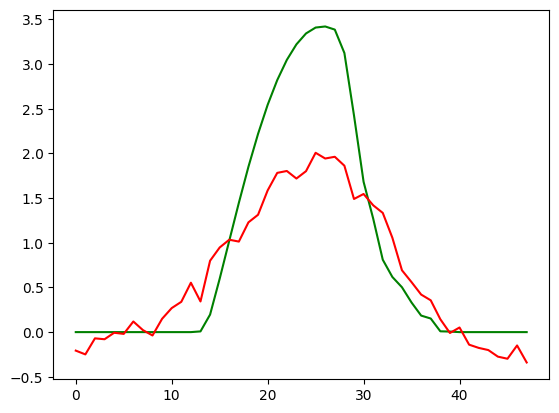

In [66]:
place = 119

act = denormalize_time_series(y_train[place], min, max)
input = x_train[place]
forecast = model(np.array([input]))

fix, ax = plt.subplots()
ax.plot(act, color="green")
#ax.plot(denormalize_time_series(input,min,max))
ax.plot(denormalize_time_series(forecast[0],min,max), color="red")
plt.show()